# Package Preperation

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pylab
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [57]:
df=pd.read_csv('https://raw.githubusercontent.com/pararawendy/dibimbing-materials/main/boston.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


The data is about predicting housing price (medv) in
Boston city
* Criminal rate (crim)
* Residential land zoned proportion (zn)
* Non-retail business acres proportion (indus)
* Is bounds with river (chas)
* Nitrogen oxides concentration (nox)
* Number rooms average (rm)
* Owner age proportion (age)
* Weighted distance to cities (dis)
* Accessibility index (rad)
* Tax rate (tax)
* Pupil-teacher ratio (ptratio)
* Black proportion (black)
* Percent lower status (lstat)

In [58]:
#lets take a quick look what this data all about
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


# DATA CLEANSING

In [59]:
df.describe().round(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [60]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

OK, there's no nan/null value

In [61]:
for column in df:
    print(column,'\n',df[column].unique())

crim 
 [6.32000e-03 2.73100e-02 2.72900e-02 3.23700e-02 6.90500e-02 2.98500e-02
 8.82900e-02 1.44550e-01 2.11240e-01 1.70040e-01 2.24890e-01 1.17470e-01
 9.37800e-02 6.29760e-01 6.37960e-01 6.27390e-01 1.05393e+00 7.84200e-01
 8.02710e-01 7.25800e-01 1.25179e+00 8.52040e-01 1.23247e+00 9.88430e-01
 7.50260e-01 8.40540e-01 6.71910e-01 9.55770e-01 7.72990e-01 1.00245e+00
 1.13081e+00 1.35472e+00 1.38799e+00 1.15172e+00 1.61282e+00 6.41700e-02
 9.74400e-02 8.01400e-02 1.75050e-01 2.76300e-02 3.35900e-02 1.27440e-01
 1.41500e-01 1.59360e-01 1.22690e-01 1.71420e-01 1.88360e-01 2.29270e-01
 2.53870e-01 2.19770e-01 8.87300e-02 4.33700e-02 5.36000e-02 4.98100e-02
 1.36000e-02 1.31100e-02 2.05500e-02 1.43200e-02 1.54450e-01 1.03280e-01
 1.49320e-01 1.71710e-01 1.10270e-01 1.26500e-01 1.95100e-02 3.58400e-02
 4.37900e-02 5.78900e-02 1.35540e-01 1.28160e-01 8.82600e-02 1.58760e-01
 9.16400e-02 1.95390e-01 7.89600e-02 9.51200e-02 1.01530e-01 8.70700e-02
 5.64600e-02 8.38700e-02 4.11300e-02 4.46200

Result : OK, there is no data simmilar to white space, null/nan object

In [62]:
df.duplicated().sum()

0

In [63]:
for i in enumerate(df):
    print(i)

(0, 'crim')
(1, 'zn')
(2, 'indus')
(3, 'chas')
(4, 'nox')
(5, 'rm')
(6, 'age')
(7, 'dis')
(8, 'rad')
(9, 'tax')
(10, 'ptratio')
(11, 'black')
(12, 'lstat')
(13, 'medv')


Result : OK,there is no duplicate data

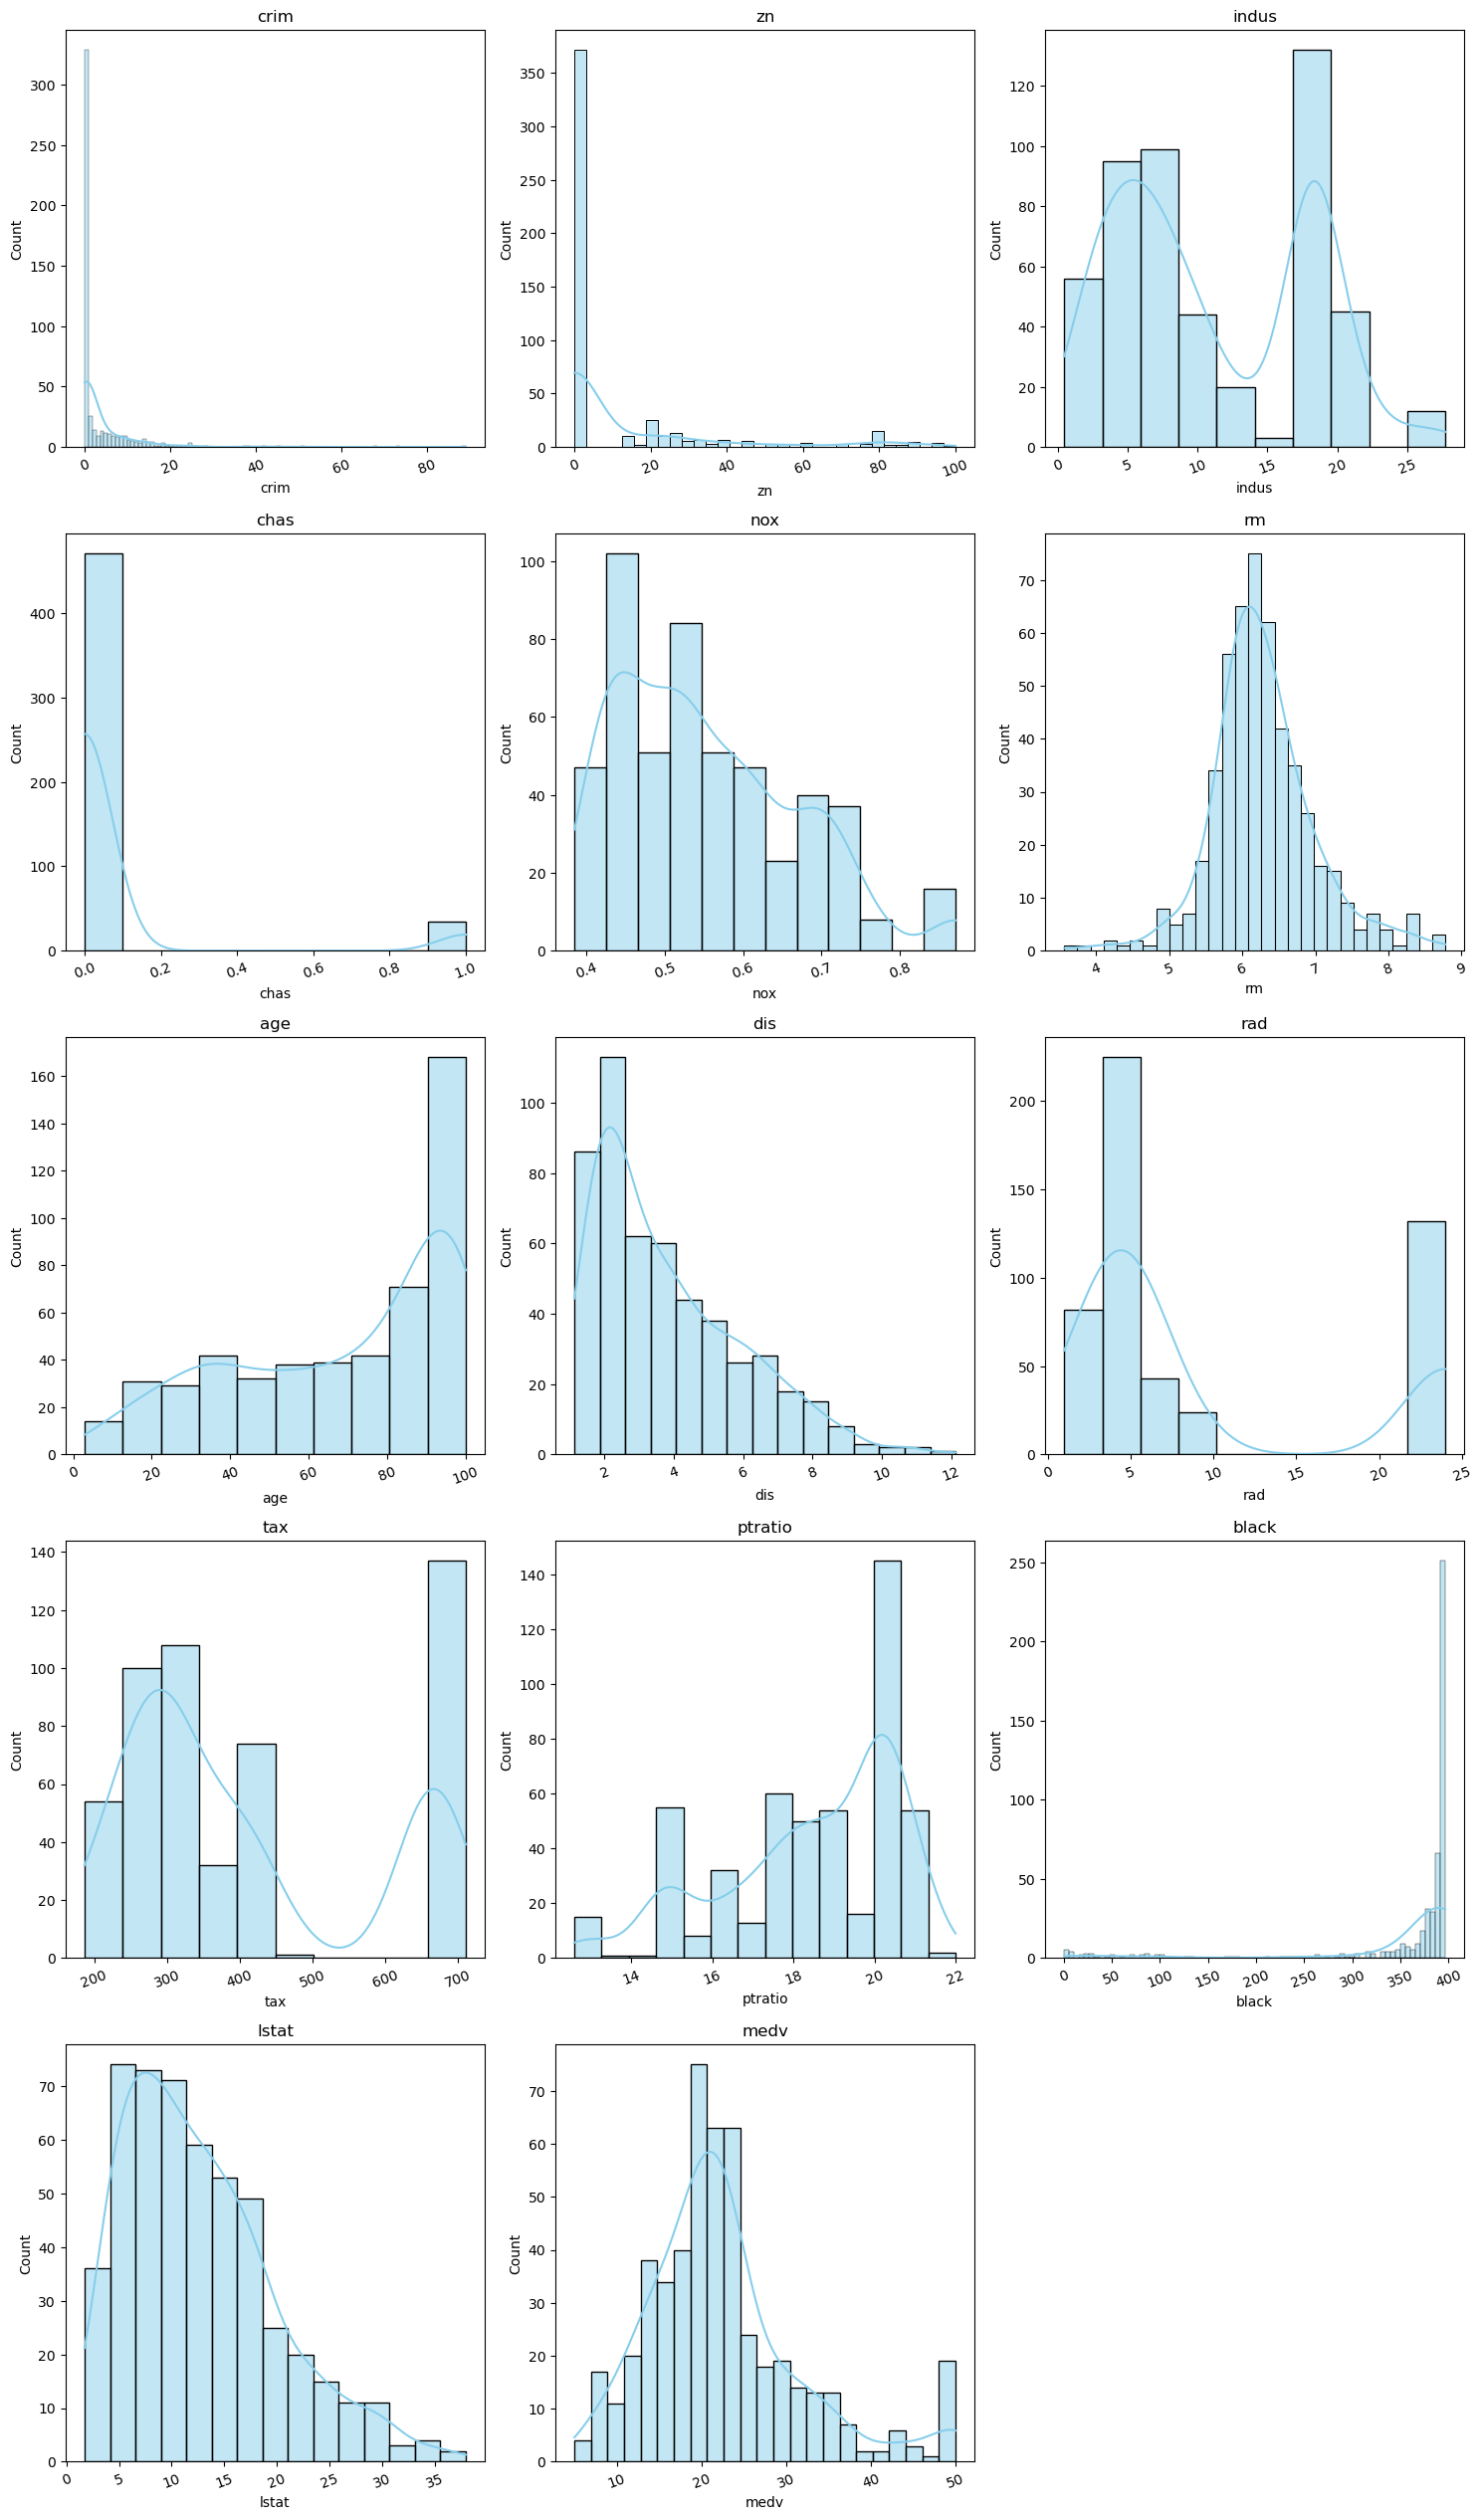

In [64]:
plt.figure(figsize = (15, 30))
for i,col in enumerate(df):
    plt.subplot(6, 3,i+1)
    sns.histplot(data=df, x=col, color='skyblue', kde=True).set(title=col)
    plt.xticks(rotation = 20)
plt.tight_layout()
plt.show()

Obeservation
* `Chas`is categorical value
* `Nox`,`ptratio`,and `black` got many outliner
* `medv` and `rm` are normal distribution other tend to skew 

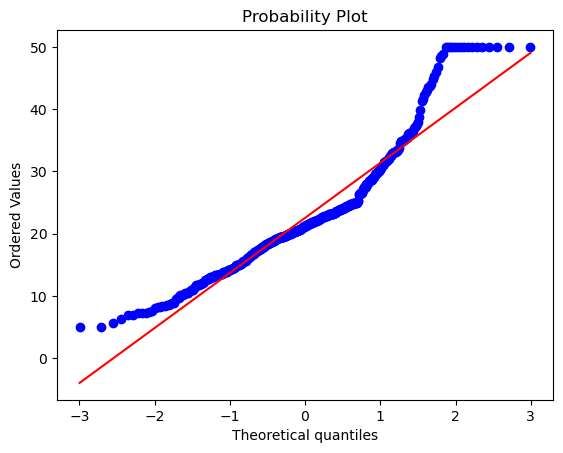

In [65]:
# just checking distribution target using probability plot  
stats.probplot(df['medv'], dist="norm", plot=pylab)
#sm.qqplot(df['medv'], line ='45')
plt.show()

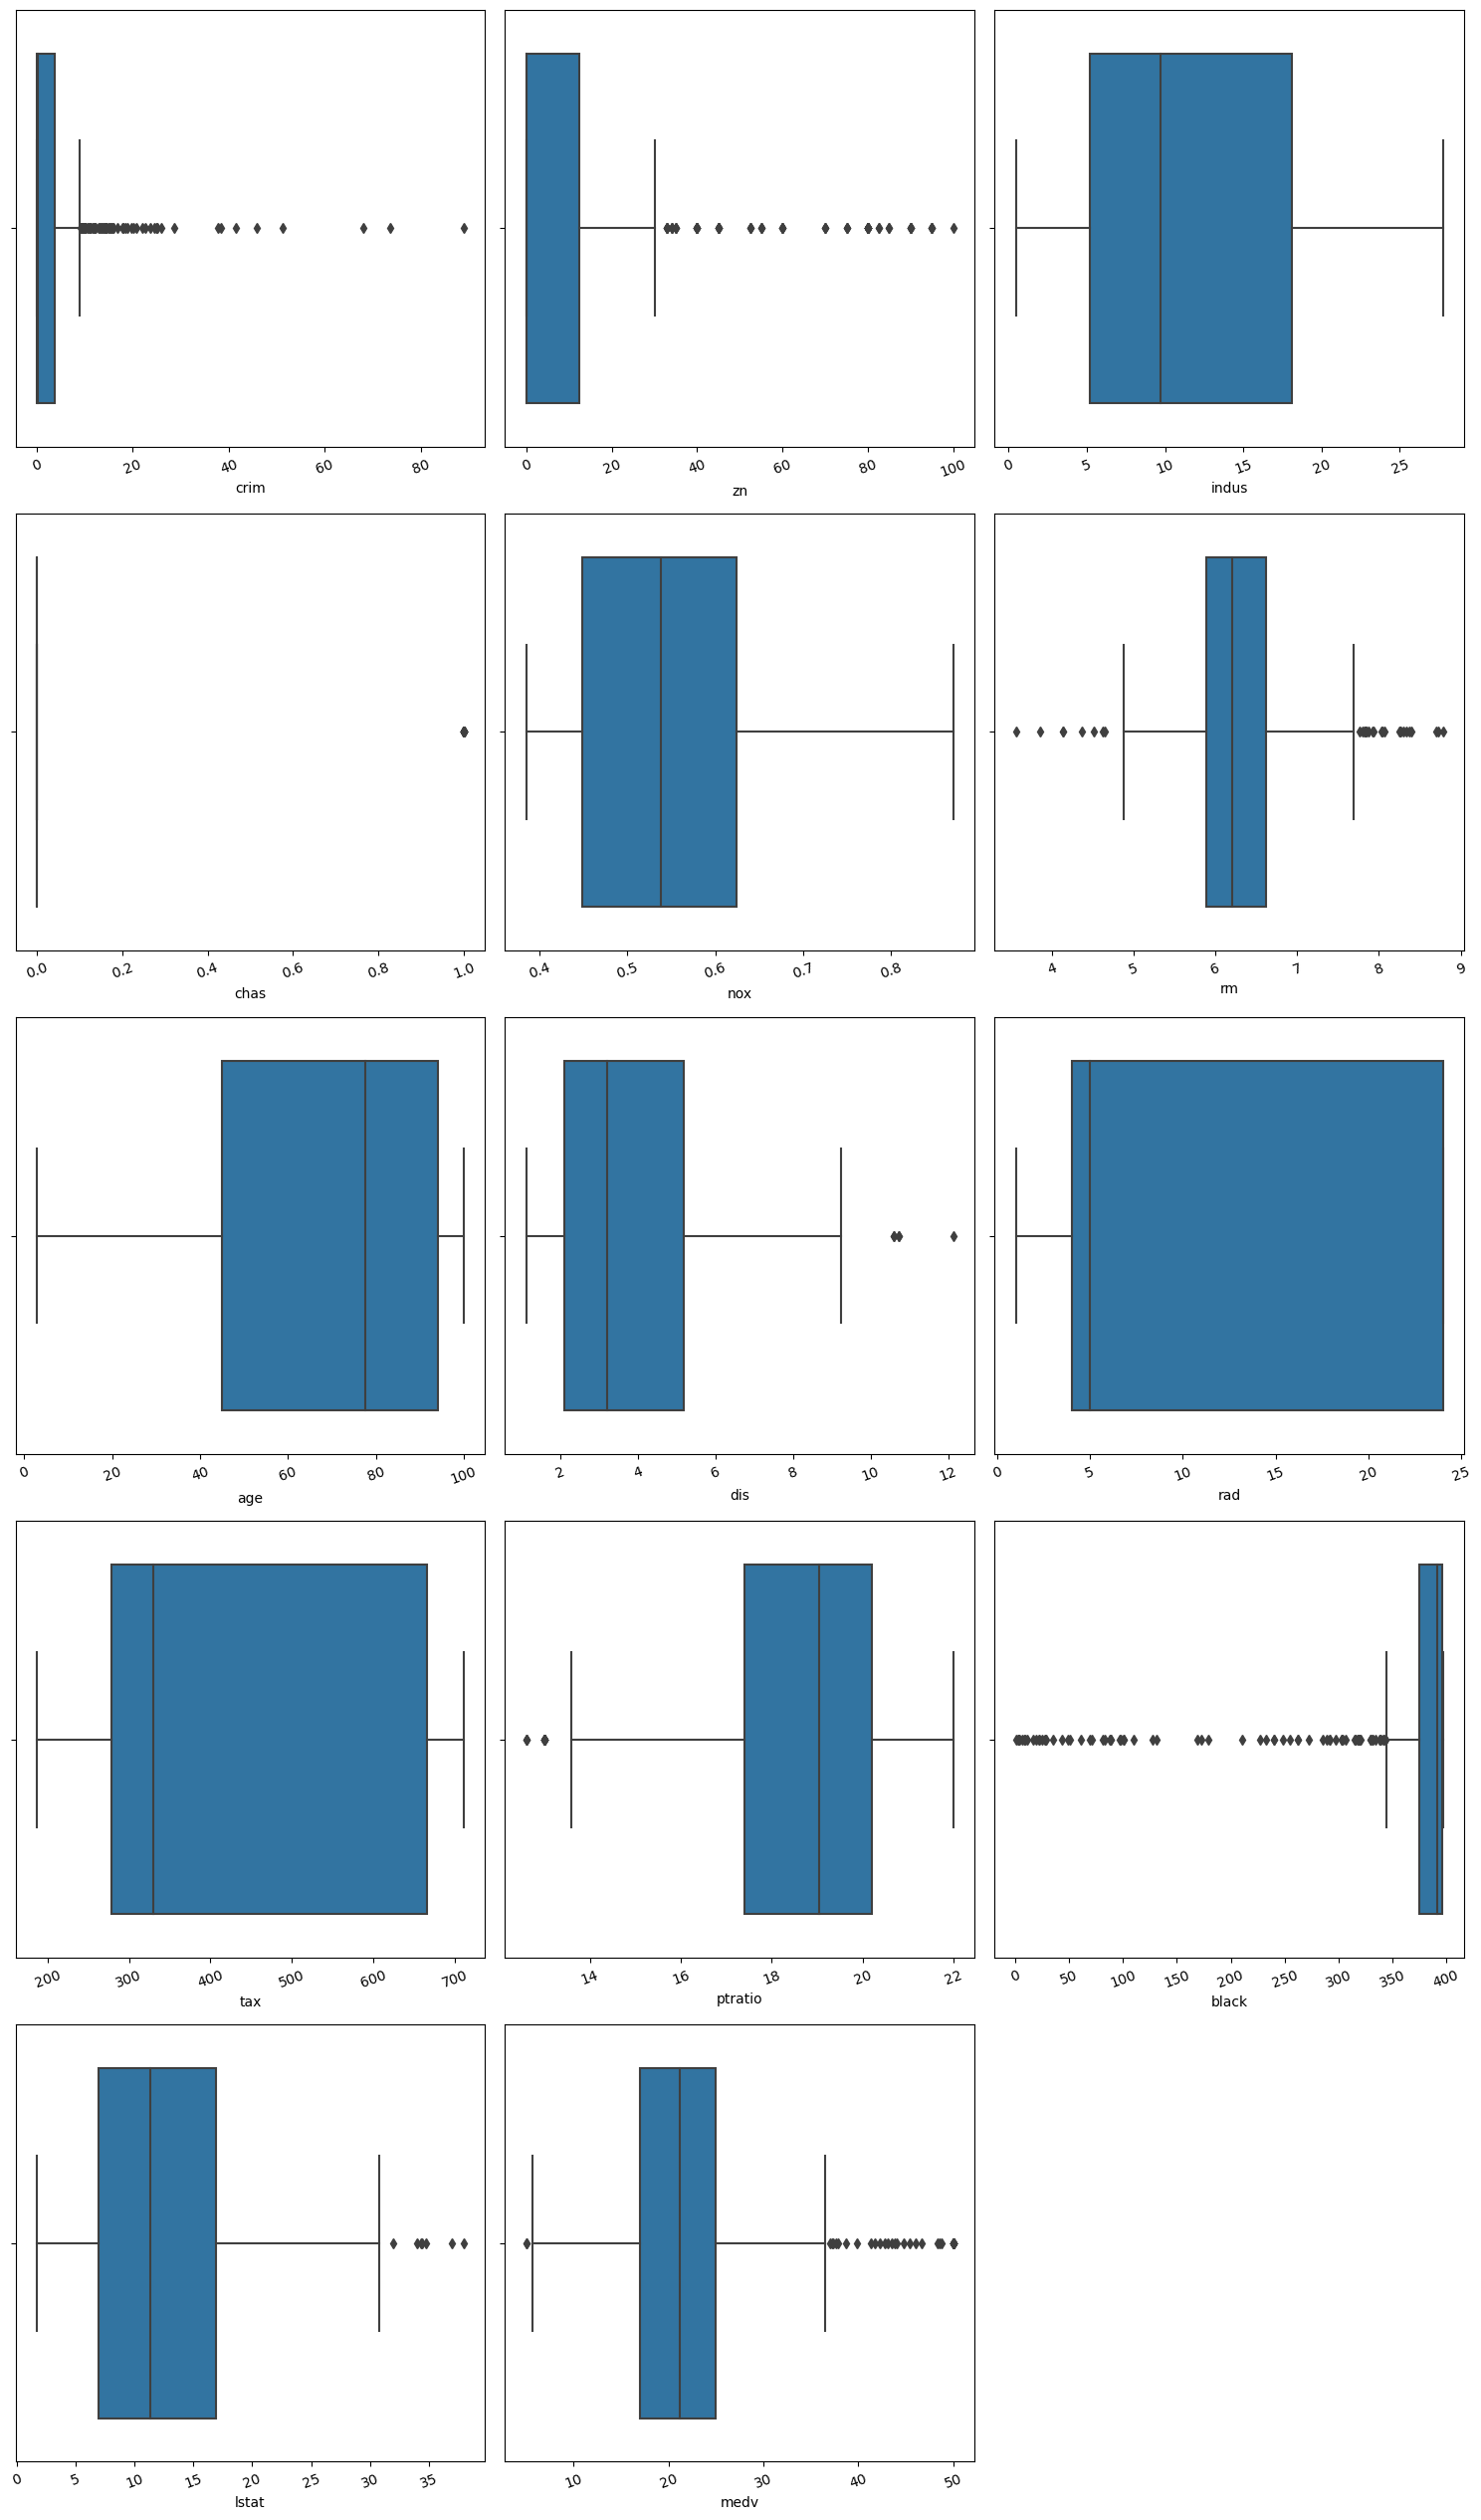

In [66]:
features = df
plt.figure(figsize = (15, 30))
for i,col in enumerate(features):
    plt.subplot(6, 3,i+1)
    sns.boxplot(data = df,x=col)
    plt.xticks(rotation = 20)
plt.tight_layout()

Observation
* our target `medv` got some outliner but we will leave that alone because we dont need to clean our target
* just like our last Observation some of our data have some outliner so we need to log transform our data to make it normal distribution and rid outliners
* `black columns` have extreme outliner so i want to add extra step to process it

## Extra step to clean outliner on `Criminal` column

In [67]:
df_log=df.copy()
lis = ['crim','zn','rm','black','lstat']
for i in lis :
    df_log[i]=np.log(df_log[i])
df_log

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,-5.064036,2.890372,2.31,0,0.538,1.883275,65.2,4.0900,1,296,15.3,5.983684,1.605430,24.0
1,-3.600502,-inf,7.07,0,0.469,1.859574,78.9,4.9671,2,242,17.8,5.983684,2.212660,21.6
2,-3.601235,-inf,7.07,0,0.469,1.971996,61.1,4.9671,2,242,17.8,5.973377,1.393766,34.7
3,-3.430523,-inf,2.18,0,0.458,1.945624,45.8,6.0622,3,222,18.7,5.977949,1.078410,33.4
4,-2.672924,-inf,2.18,0,0.458,1.966693,54.2,6.0622,3,222,18.7,5.983684,1.673351,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-2.770511,-inf,11.93,0,0.573,1.886008,69.1,2.4786,1,273,21.0,5.971236,2.269028,22.4
502,-3.095111,-inf,11.93,0,0.573,1.811562,76.7,2.2875,1,273,21.0,5.983684,2.206074,20.6
503,-2.800824,-inf,11.93,0,0.573,1.942476,91.0,2.1675,1,273,21.0,5.983684,1.729884,23.9
504,-2.211009,-inf,11.93,0,0.573,1.916040,89.3,2.3889,1,273,21.0,5.974954,1.868721,22.0


506
489


<AxesSubplot:>

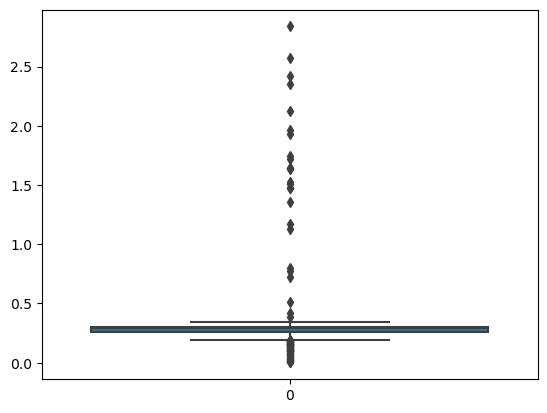

In [68]:
df_log['zscore']=abs(stats.zscore(df_log['black']))
df_log=df_log[df_log['zscore']<3]
print(len(df))
print(len(df_log))
sns.boxplot(df_log['zscore'])

In [69]:
Q1=df_log['black'].quantile(0.25)
Q3=df_log['black'].quantile(0.75)
IQR=Q3-Q1
lowlimit=Q1-(1.5*IQR)
highlimit=Q3+(1.5*IQR)
df_log=df_log[(df_log['black']>lowlimit) & (df_log['black']<highlimit)]
len(df)
len(df_log)

424

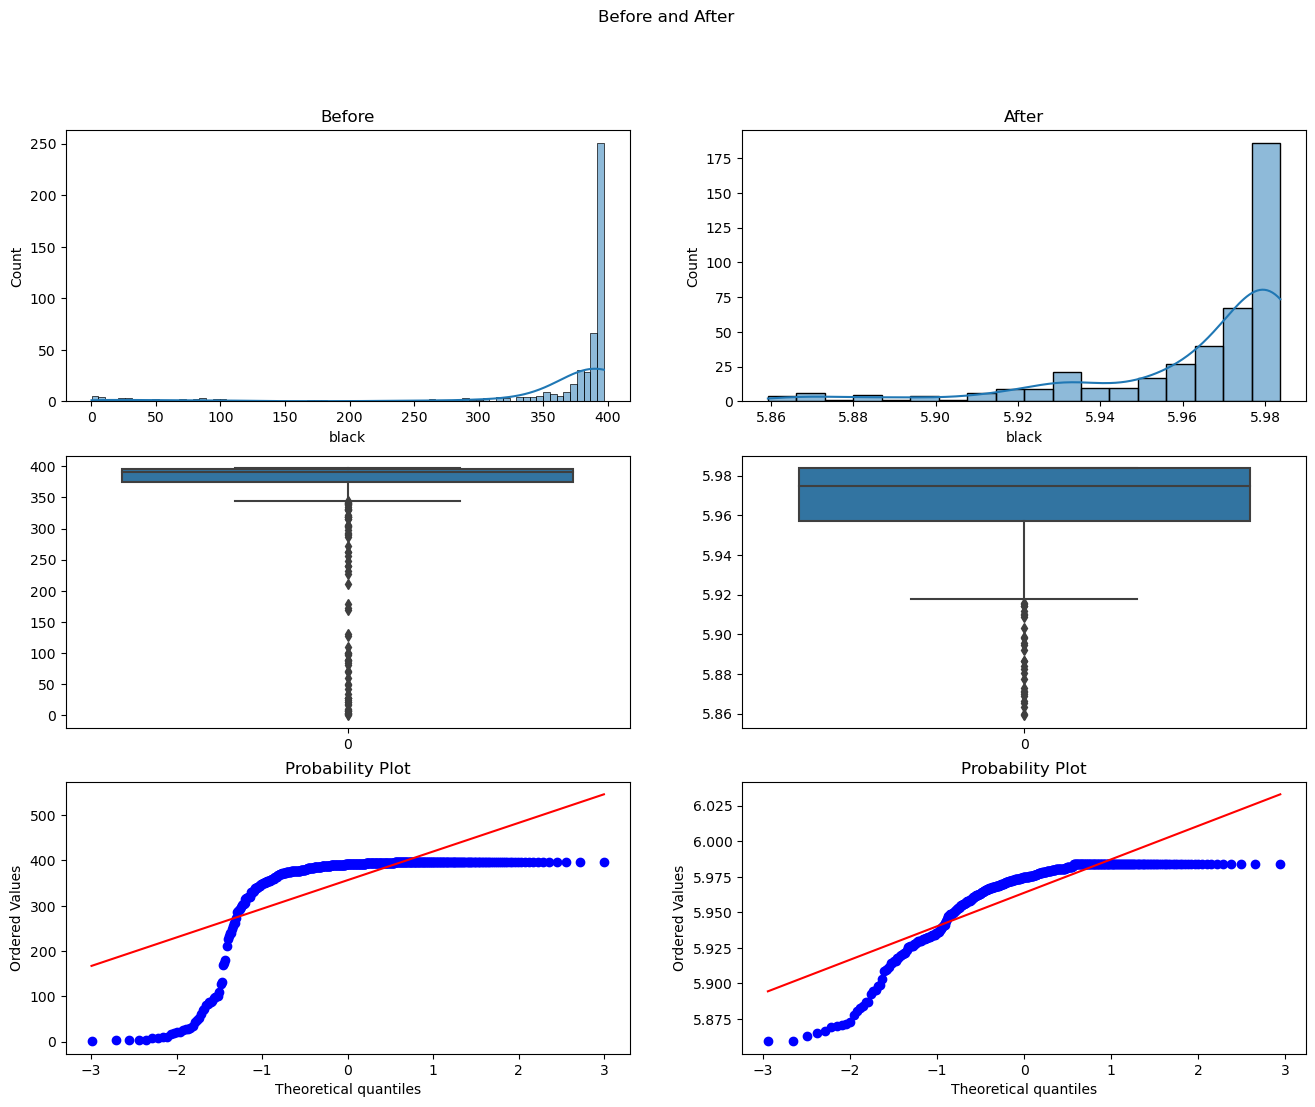

In [70]:
fig, axes = plt.subplots(3, 2,figsize=(16,12))
fig.suptitle('Before and After')

axes[0,0].set_title('Before')
sns.histplot(df['black'],ax=axes[0,0],kde=True)
sns.boxplot(df['black'],ax=axes[1,0])
stats.probplot(df['black'], dist="norm", plot=axes[2,0])
#sm.ProbPlot(df['black']).qqplot(line='s',color ='green', ax=axes[2,0])

axes[0,1].set_title('After')
sns.histplot(df_log['black'],ax=axes[0,1],kde=True)
sns.boxplot(df_log['black'],ax=axes[1,1])
stats.probplot(df_log['black'], dist="norm", plot=axes[2,1])
#sm.ProbPlot(df_log['black']).qqplot(line='s',color ='green', ax=axes[2,1])

plt.tight_layout
plt.show()

<AxesSubplot:>

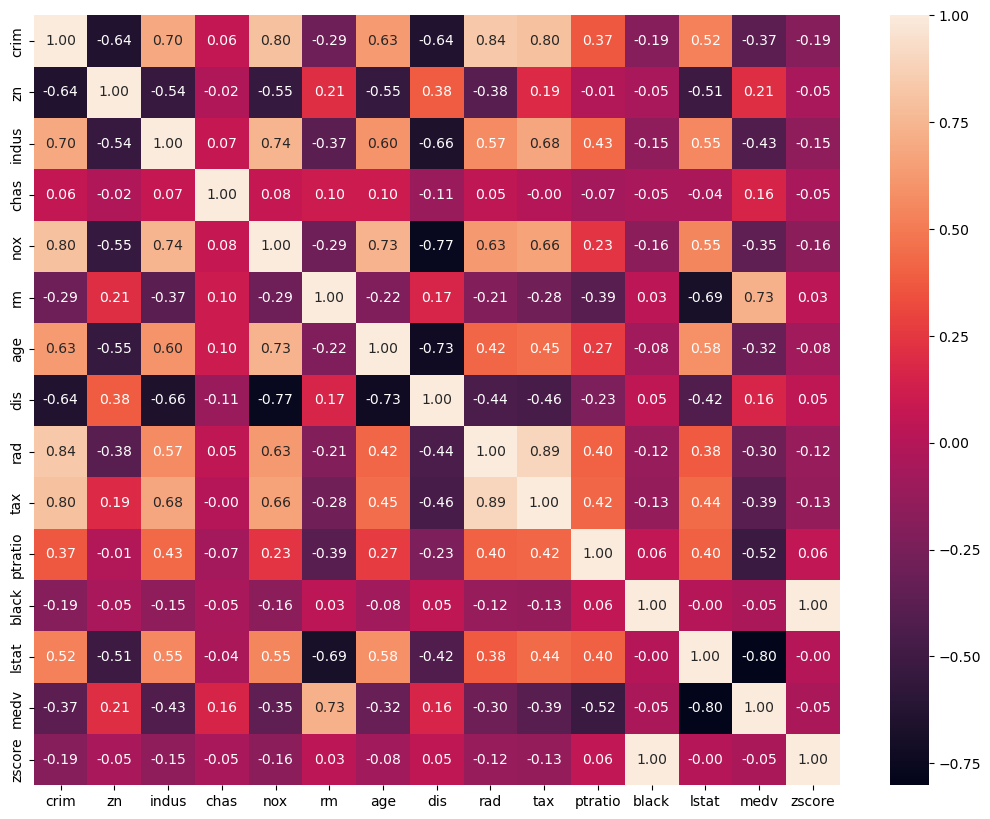

In [71]:
plt.figure(figsize = (13, 10))
correlation = df_log.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

<AxesSubplot:>

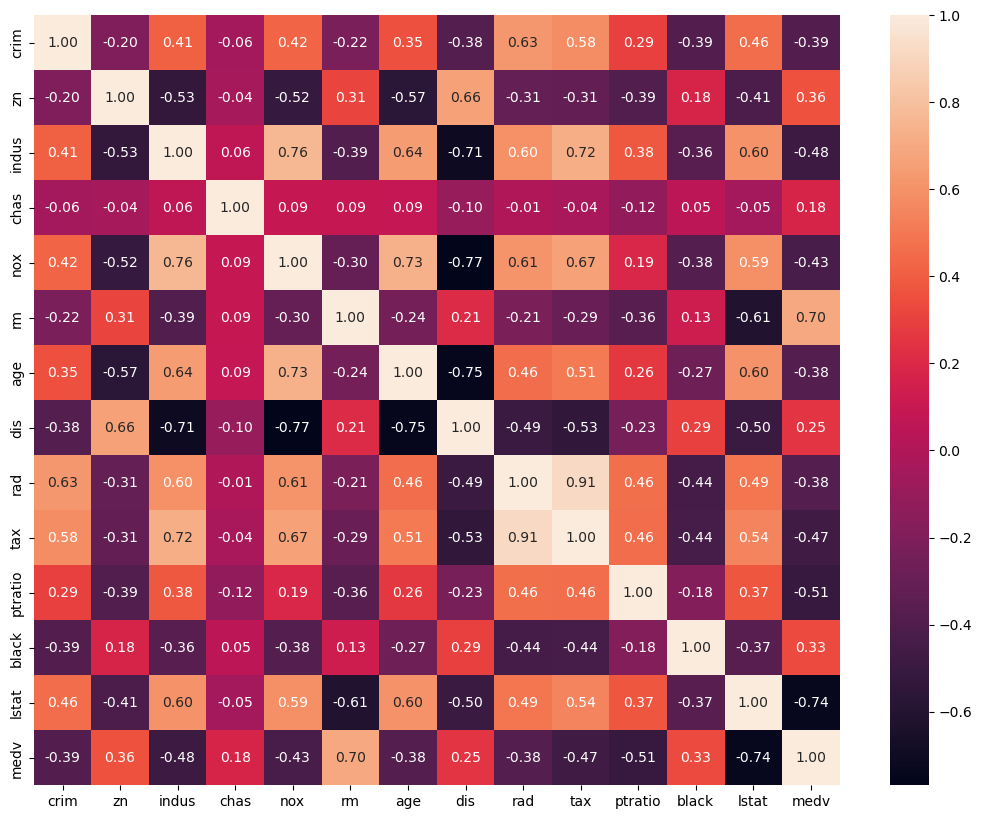

In [72]:
plt.figure(figsize = (13, 10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

we can see even we tried to transform and clean outliner from `black` column there is still many outliner, furthermore after we process it `black` correlation to our target drop from -0.26 to -0.05  
  
with this analysis i will drop black from our model

In [73]:
df2=df.copy()
lis = ['crim','zn','rm','black','lstat']
for i in lis :
    df2[i]=np.log(df2[i]+1)
df_log.drop(columns=['black'],inplace=True)

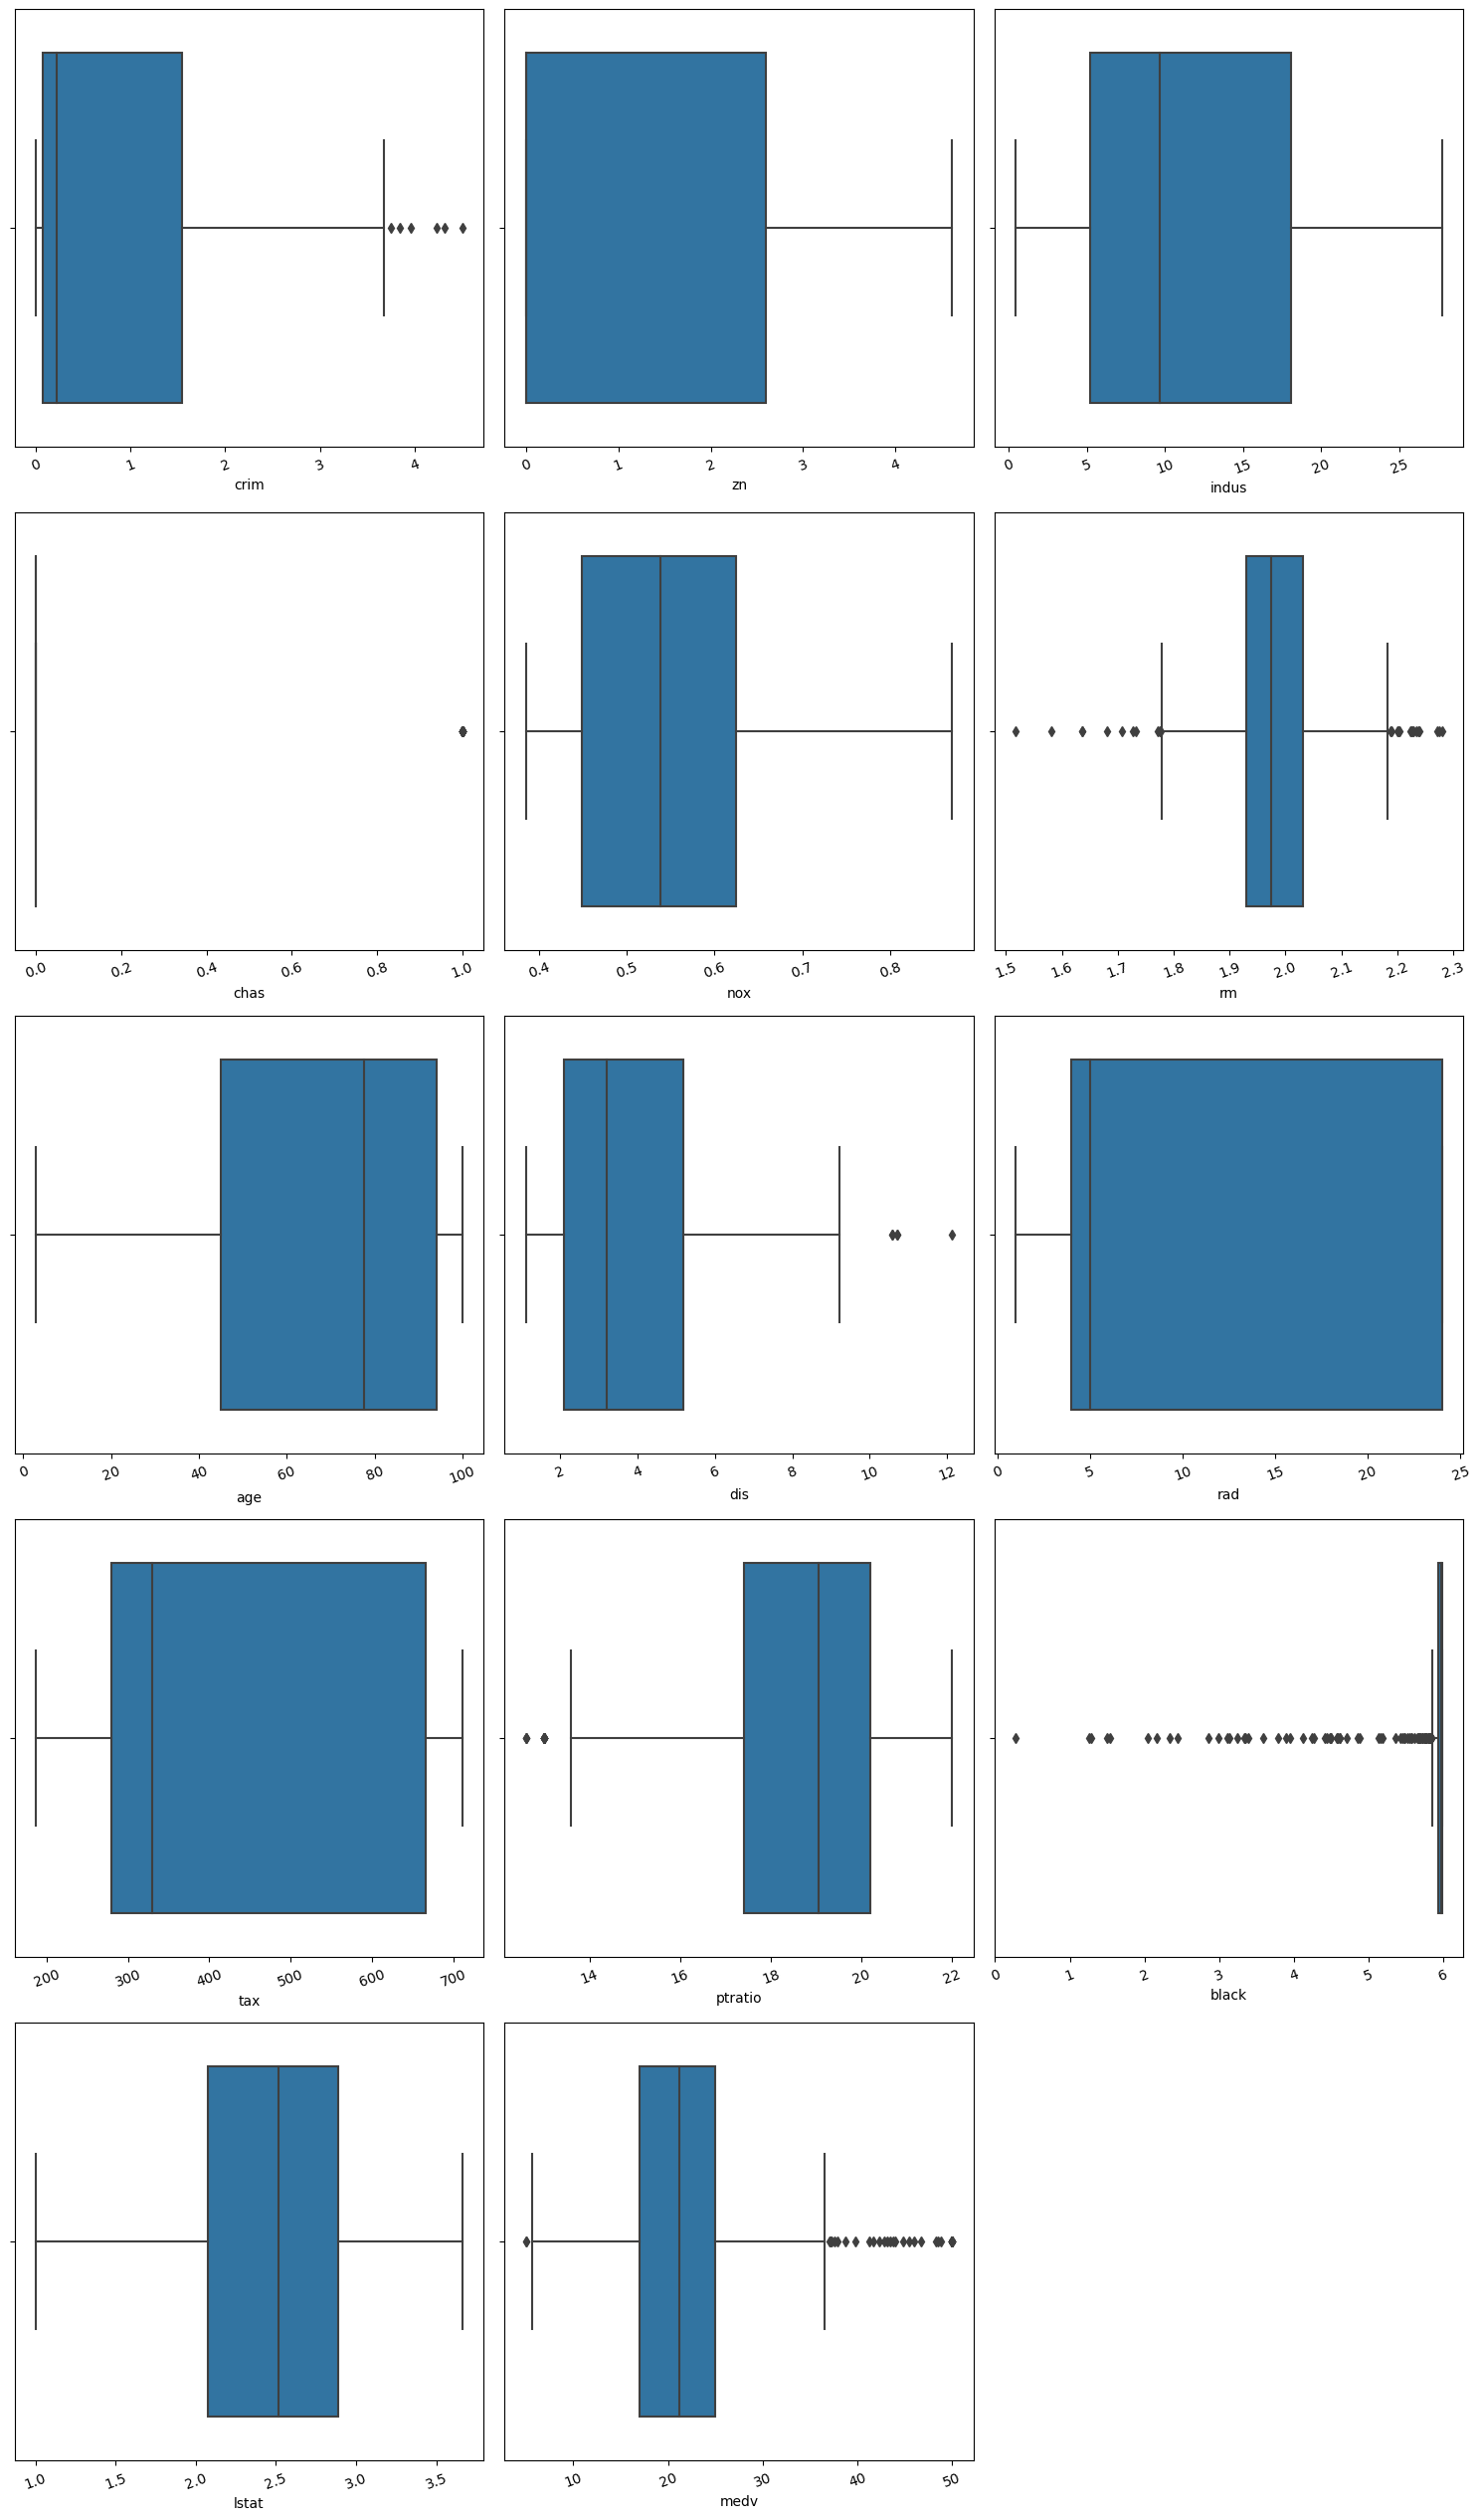

In [77]:
features = df2
plt.figure(figsize = (15, 30))
for i,col in enumerate(features):
    plt.subplot(6, 3,i+1)
    sns.boxplot(data = df2,x=col)
    plt.xticks(rotation = 20)
plt.tight_layout()

# Machine Learning-Linear Regression

In [ ]:
#split train test
feature=df2.drop('medv',axis=1)
target=df2[['medv']]
ftr_pretrain, ftr_test,tgt_pretrain,tgt_test=train_test_split(feature,
                                                        target,
                                                        test_size=0.2, # 80% for train 20% test 
                                                        random_state=42)

ftr_train, ftr_validation, tgt_train, tgt_validation = train_test_split(ftr_pretrain, tgt_pretrain, test_size=0.20, random_state=42)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(ftr_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,8.333214
2,zn,2.790712
3,indus,3.711682
4,chas,1.109806
5,nox,4.675539
6,rm,2.288685
7,age,3.204981
8,dis,4.720538
9,rad,10.744510
10,tax,7.802694


Observation
  
There are several features with high VIF scores:
1. `crim`
1. `tax` 
2. `rad` 
3. `nox` 
4. `dis`
5. `indus`
6. `Istat`

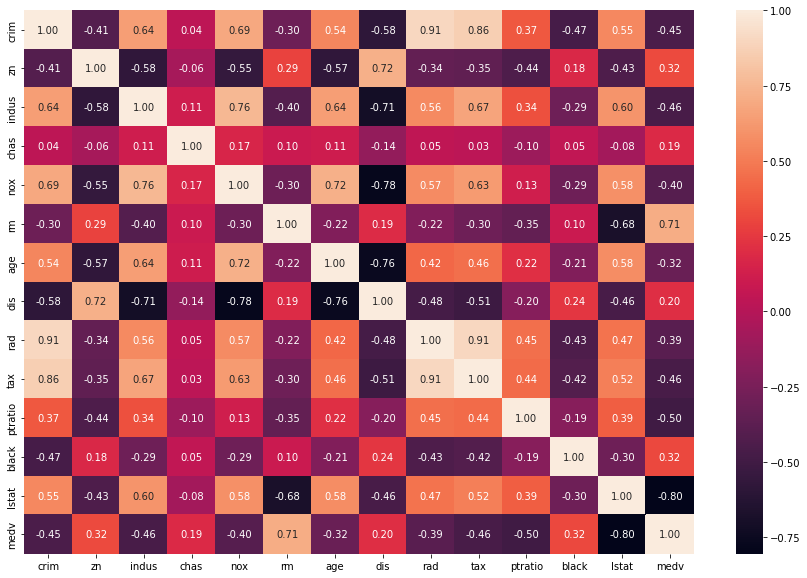

In [ ]:
# heatmap correlation
medv_train = pd.concat([ftr_train, tgt_train], axis=1)
corr = medv_train.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

observation
* `Istat` & `Indus` highly corelated to target
* `rad` & `Tax` hightly corelated to each other, while `tax` higher corelated to target
* `nox` & `dis` medium corelated to each other, while `nox` higher corelated to target  

Therefore, we need to drop:
1. `rad`
2. `dis`


In [ ]:
ftr_train = ftr_train.drop(columns=['rad','dis'])
ftr_test = ftr_test.drop(columns=['rad','dis'])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(ftr_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,5.001374
2,zn,2.115742
3,indus,3.394082
4,chas,1.095026
5,nox,4.376359
6,rm,2.198486
7,age,2.784349
8,tax,5.013800
9,ptratio,1.890921
10,black,1.325099


observation
* `nox` , `indus` and, `istat` still high we need drop more
* `nox` highly corelated to `indus` , while `indus` higher corelated
* `age` and `rm` highly corelated to `Istat`, while rm higer

Therefore, we need to drop:
1. `nox`
2. `age`
3. `crim`

In [ ]:
ftr_train = ftr_train.drop(columns=['nox','age','crim'])
ftr_test = ftr_test.drop(columns=['nox','age','crim'])
ftr_validation = ftr_validation.drop(columns=['nox','age','rad','dis','crim'])

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(ftr_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,zn,1.731460
2,indus,2.788506
3,chas,1.071281
4,rm,1.969228
5,tax,2.323017
6,ptratio,1.506363
7,black,1.247519
8,lstat,2.686135


Result: OK
Question : Dear Mentor, jika pada Heat map semua sudah di bawah 0.8 atau diatas -0.8 harus kah melanjutkan drop column hingga hasilnya vif dibawah 3.0 ? atau jika vif < 5 dan heat map < 8 sudah cukup?

# Model Training

##  Ridge

In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_train = ftr_train.to_numpy()
y_train = tgt_train.to_numpy()
y_train = y_train.reshape(len(y_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_train, y_train)
ridge_reg_pointone.fit(X_train, y_train)
ridge_reg_one.fit(X_train, y_train)
ridge_reg_ten.fit(X_train, y_train)

Ridge(alpha=10, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

X_validation = ftr_validation.to_numpy()
y_validation = tgt_validation.to_numpy()
y_validation = y_validation.reshape(len(y_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_validation)
    rmse = np.sqrt(mean_squared_error(y_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.538489985629398
RMSE of Ridge regression model with alpha = 0.1 is 4.523057518597492
RMSE of Ridge regression model with alpha = 1.0 is 4.4702625320781895
RMSE of Ridge regression model with alpha = 10 is 4.532473715610997


alpha 1.0 was the best among other alpha, because smallest RMSE with 4.47

In [ ]:
ridge_best = ridge_reg_one
coef_df = pd.DataFrame({
    'feature':['intercept'] + ftr_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,24.765749
1,zn,-0.549226
2,indus,0.026654
3,chas,3.037166
4,rm,17.502203
5,tax,-0.000341
6,ptratio,-0.930397
7,black,1.180758
8,lstat,-10.692195


it means that model medv from  
mdev= intercept + zn -0.549226 + indus 0.026654 + chas 3.037166 + rm 17.502203
+tax -0.000341
+ptratio	-0.930397
+black 1.180758 +lstat -10.692195

every point multiplied by coefficient and sum every feature

### Diagnostic Study

In [ ]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_train)

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_train)))

R-squared for training data is 0.6484045848666263


Model yang telah kita buat mampu memprediksi secara tepat 64.8% dari data test

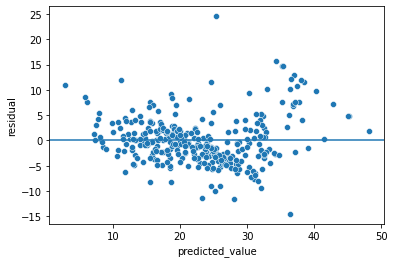

In [ ]:
# calculate residuals
residual = y_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

observation
* Linear relationship OK : there is no linear pattern and residual centered around 0
* Constant variance NG : from 0-10 and 40-50 there is a gap, many data centered in middle area
* Independent observations OK : data independent around plot and not showing any specific pattern

Conclucion
From R-squared we can accurately predict 65% test data and passed 2 assumtion.
we can use linear regression as our model to predict target

### Training Error

In [ ]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_train)


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_train, y_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train, y_train)))

RMSE for training data is 4.788631494127284
MAE for training data is 3.527414261246457
MAPE for training data is 0.17518584554917263


RMSE (root mean square eror) : 4.78 it means that eror are between +-4.78 from our target.  
MAE (mean absolute eror) : RMSE 4.78 near to MAE 3.53 it means our eror dont have high variance  
MAPE (mean absolute percetage eror): it means our model eror deviates 17 % from our test data

### Testing eror

In [ ]:
# prepare prediction result on test data
X_test = ftr_test.to_numpy()
y_predict_test  = ridge_best.predict(X_test)

# ground truth target
y_test = tgt_test.to_numpy()
y_test = y_test.reshape(len(y_test),)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test, y_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_test)))

RMSE for testing data is 4.719098841506863
MAE for testing data is 3.0634975440607635
MAPE for testing data is 0.22585411622274712


observation
* RMSE : testing error (4.719) little lower than training error (4.788), but not far away
* MAE : testing error (3.06) little lower than training error (3.527), but not far away
* MAPE : testing error (22,6 %) little higher than training error (17,5%), but not far away

Conclusion
from observation above both testing and training eror value not too far fram each other, we can conclude our model **just right** 

## Lasso

In [ ]:
from sklearn.linear_model import Lasso

# train the model
X_train = ftr_train.to_numpy()
y_train = tgt_train.to_numpy()
y_train = y_train.reshape(len(y_train),)

# define the model
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_train, y_train)
lasso_reg_pointone.fit(X_train, y_train)
lasso_reg_one.fit(X_train, y_train)
lasso_reg_ten.fit(X_train, y_train)

Lasso(alpha=10, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

X_validation = ftr_validation.to_numpy()
y_validation = tgt_validation.to_numpy()
y_validation = y_validation.reshape(len(y_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_validation)
    rmse = np.sqrt(mean_squared_error(y_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.518087191279293
RMSE of Ridge regression model with alpha = 0.1 is 4.4654888797836545
RMSE of Ridge regression model with alpha = 1.0 is 4.88591195541837
RMSE of Ridge regression model with alpha = 10 is 7.477405584294333


In [ ]:
lasso_best = lasso_reg_pointone

coef_df = pd.DataFrame({
    'feature':['intercept'] + ftr_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,43.451681
1,zn,-0.506475
2,indus,0.021043
3,chas,1.922859
4,rm,10.096786
5,tax,-0.000425
6,ptratio,-0.968981
7,black,0.919184
8,lstat,-11.356485


### Diagnostic Study

In [ ]:
from sklearn.metrics import r2_score

y_predict_train = lasso_best.predict(X_train)

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_train)))

R-squared for training data is 0.6078018599586478


Model yang telah kita buat mampu memprediksi secara tepat 60.8% dari data test

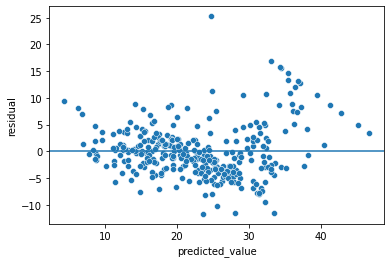

In [ ]:
# calculate residuals
residual = y_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

### Training Error

In [ ]:
# prepare prediction result on train data
y_predict_train = lasso_best.predict(X_train)


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_train, y_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train, y_train)))

RMSE for training data is 4.912667445126543
MAE for training data is 3.613904006286154
MAPE for training data is 0.16765805796296876


RMSE (root mean square eror) : 4.91 it means that eror are between +-4.91 from our target.  
MAE (mean absolute eror) : RMSE 3.61 near to MAE 3.61 it means our eror dont have high variance  
MAPE (mean absolute percetage eror): it means our model eror deviates 16.7 % from our test data

### Testing eror

In [ ]:
# prepare prediction result on test data
X_test = ftr_test.to_numpy()
y_predict_test  = lasso_best.predict(X_test)

# ground truth target
y_test = tgt_test.to_numpy()
y_test = y_test.reshape(len(y_test),)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test, y_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_test)))

RMSE for testing data is 4.6541707631020275
MAE for testing data is 3.048475802153162
MAPE for testing data is 0.18247271680337246


observation
* RMSE : testing error (4.654) little lower than training error (4.91), but not far away
* MAE : testing error (3.04) little lower than training error (3.61), but not far away
* MAPE : testing error (18,2 %) little higher than training error (16,7%), but not far away

Conclusion
from observation above both testing and training eror value not too far fram each other, we can conclude our model **just right** 

In [81]:
(df['medv'].max()-df['medv'].min())*10/100

4.5

# Conclusion
* in data cleaning process our data clean from duplicate,null/nan value. there is many feature has outliner but we solve it using log transformation.
* we tried to process `black` from outliner but still leave many outlier and small correlation to our target,therefore we decide to drop `black` colomn.
* Based on `MAE`, on average our prediction deviates the true `medv` value by 3.04 points (in USD 1000's) - so it is quite significant because the prediction can be different in thousands of dollars 
* we generally accept both model because `MAPE` is still below in 30%. 
* with comparison between 2 model (Lasso and Ridge) we chosee using Lasso.  
because RMSE,MAE,MAPE testing eror lasso smaller than ridge.